In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [203]:
death = pd.read_csv("Deaths.csv")

In [204]:
#exactly 100000 rows makes me uncomfortable, why is australia the final row
death

,Country or Area,Year,Area,Sex,Age,Cause of death (WHO),Record Type,Reliability,Source Year,Value,Value Footnotes
0,Argentina,2013,Total,Male,Total,"Certain infectious and parasitic diseases, ICD10",Data tabulated by year of registration,"Final figure, complete",2016,7120,NaN
1,Argentina,2013,Total,Male,Total,"Intestinal infectious diseases, ICD10",Data tabulated by year of registration,"Final figure, complete",2016,178,NaN
2,Argentina,2013,Total,Male,Total,"Tuberculosis, ICD10",Data tabulated by year of registration,"Final figure, complete",2016,368,NaN
3,Argentina,2013,Total,Male,Total,"Tetanus, ICD10",Data tabulated by year of registration,"Final figure, complete",2016,4,NaN
4,Argentina,2013,Total,Male,Total,"Diphtheria, ICD10",Data tabulated by year of registration,"Final figure, complete",2016,0,NaN
5,Argentina,2013,Total,Male,Total,"Whooping cough, ICD10",Data tabulated by year of registration,"Final figure, complete",2016,2,NaN
6,Argentina,2013,Total,Male,Total,"Meningococcal infection, ICD10",Data tabulated by year of registration,"Final figure, complete",2016,8,NaN
7,Argentina,2013,Total,Male,Total,"Septicaemia, ICD10",Data tabulated by year of registration,"Final figure, complete",2016,4950,NaN
8,Argentina,2013,Total,Male,Total,"Acute poliomyelitis, ICD10",Data tabulated by year of registration,"Final figure, complete",2016,0,NaN
9,Argentina,2013,Total,Male,Total,"Measles, ICD10",Data tabulated by year of registration,"Final figure, complete",2016,0,NaN


In [205]:
#Removing information about which International Statistical Classification the data is from because I don't care
death['Cause of death (WHO)'] = death['Cause of death (WHO)'].str.replace(", ICD10", "")
death['Cause of death (WHO)'] = death['Cause of death (WHO)'].str.replace(", ICD9", "")
              

In [207]:
#Creating two other DataFrames for male and female deaths
male_deaths = death[death['Sex'] == 'Male']
female_deaths = death[death['Sex'] == 'Female']

In [212]:
#Getting total deaths by cause by sex
#Then realizing that several of the columns are meaningless when summed and getting rid of them
summed_male_deaths = male_deaths.sort_values(by=['Cause of death (WHO)']).groupby(['Cause of death (WHO)']).sum().reset_index()
summed_female_deaths = female_deaths.sort_values(by=['Cause of death (WHO)']).groupby(['Cause of death (WHO)']).sum().reset_index()

summed_male_deaths = summed_male_deaths.drop(columns=['Year', 'Source Year', 'Value Footnotes'])
summed_female_deaths = summed_female_deaths.drop(columns=['Year', 'Source Year', 'Value Footnotes'])

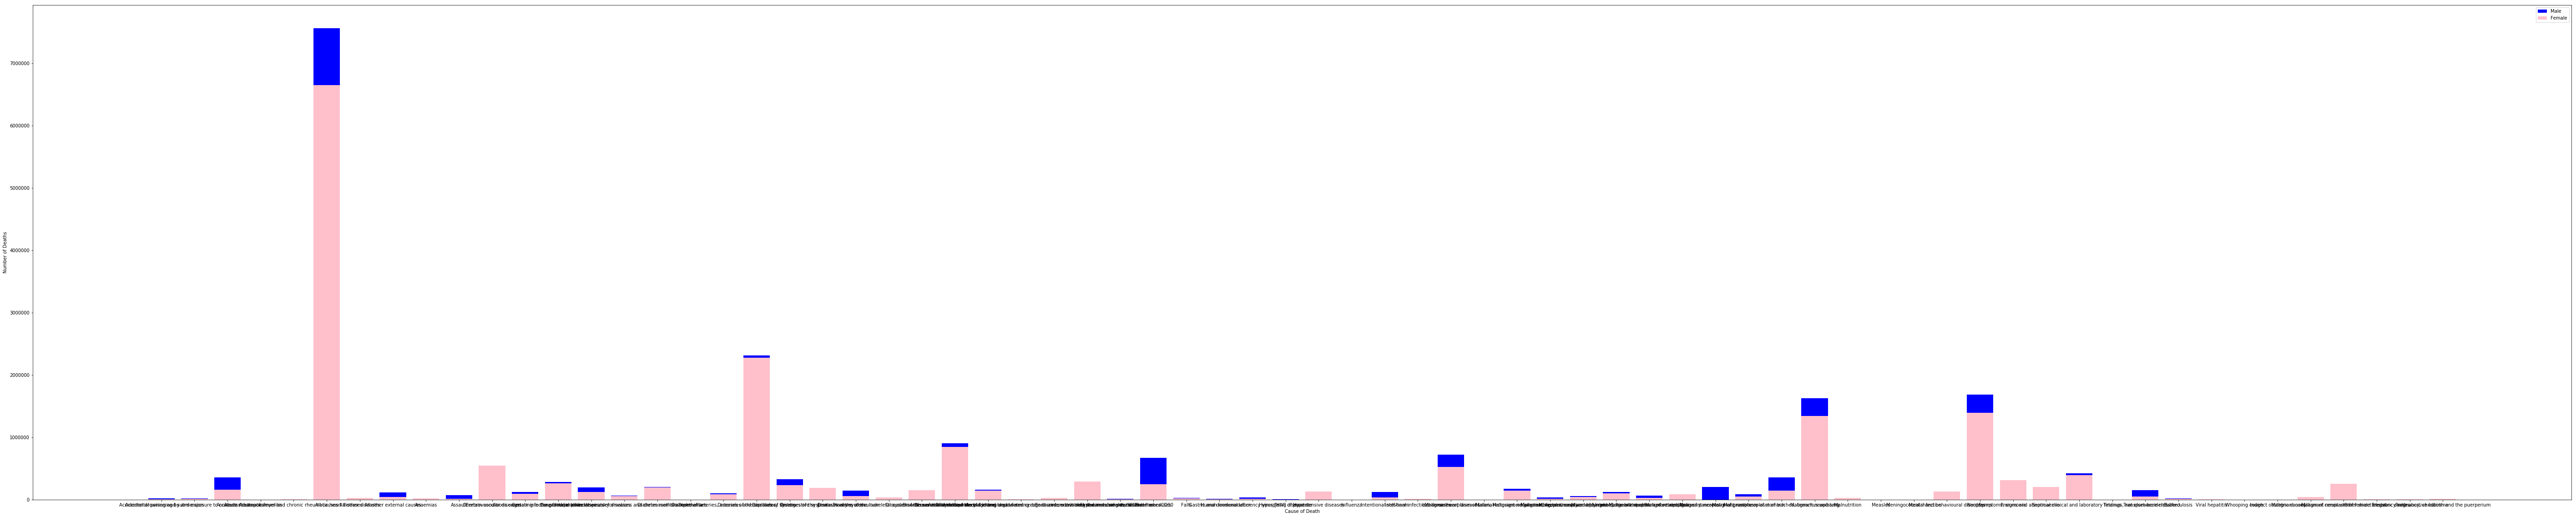

In [238]:
"""
This is my first attempt to visualize the differences between total male and female deaths over the whole period.
For now, the bars are so scrunched that they are stacked on top of each other and there are way too many bars for
it to be useful.
"""
plt.figure(figsize=(100,20))
plt.bar(summed_male_deaths['Cause of death (WHO)'], summed_male_deaths['Value'], label="Male", color='blue')
plt.bar(summed_female_deaths['Cause of death (WHO)'], summed_female_deaths['Value'], label="Female", color='pink')
plt.xlabel("Cause of Death")
plt.ylabel("Number of Deaths")
plt.legend()
plt.show()

In [220]:
'''
Planning to combine listings because distinction between neoplasms is probably something most don't care about, 
will be interesting to see if this makes neoplasms a ridiculously big outlier.
'''
sum(summed_male_deaths['Value'][41:50])

1181546

In [ ]:
#hmmmm there are 4 more ways for women to die than men. But more than 4 unique ways because men have some uniques too.
summed_female_deaths

In [226]:
#Finding out what kills just men/women, had to convert series into list, might make these a small subplot
unique_male_killers = []
for killer in list(summed_male_deaths['Cause of death (WHO)']):
    if killer not in list(summed_female_deaths['Cause of death (WHO)']):
        unique_male_killers.append(killer)
        
unique_female_killers = []
for killer in list(summed_female_deaths['Cause of death (WHO)']):
    if killer not in list(summed_male_deaths['Cause of death (WHO)']):
        unique_female_killers.append(killer)

In [227]:
unique_male_killers

['Hyperplasia of prostate', 'Malignant neoplasm of prostate']

In [230]:
unique_female_killers

['Indirect obstetric causes',
 'Malignant neoplasm of cervix uteri',
 'Malignant neoplasm of female breast',
 'Other direct obstetric causes',
 'Pregnancy with abortive outcome',
 'Pregnancy, childbirth and the puerperium']